# Advanced Web Scraping - Problems

**Author:** Ties de Kok ([Personal Website](https://www.tiesdekok.com))  <br>
**Last updated:** September 2020  
**Python version:** Python 3.6+     
**Recommended environment: `researchPython`**

In [ ]:
import os
recommendedEnvironment = 'researchPython'
if os.environ['CONDA_DEFAULT_ENV'] != recommendedEnvironment:
    print('Warning: it does not appear you are using the {0} environment, did you run "conda activate {0}" before starting Jupyter?'.format(recommendedEnvironment))

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Introduction</span>
</div>

<div style='border-style: solid; padding: 5px; border-color: darkred; border-width:5px;  text-align: center; margin-left: 100px; margin-right:100px;'>
<span style='color:black; font-size: 20px; font-weight:bold;'> Make sure to open up the respective tutorial notebook(s)! <br> That is what you are expected to use as primary reference material. </span>
</div>

### Relevant tutorial notebooks:

1) [`0_python_basics.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/0_python_basics.ipynb)  


2) [`2_handling_data.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/2_handling_data.ipynb)  


3) [`4_web_scraping.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/4_web_scraping.ipynb)  

## Import required packages

In [1]:
import time, os, sys

In [2]:
import requests
from requests_html import HTMLSession

In [3]:
import pandas as pd
import numpy as np

## Selenium

In [4]:
import selenium
from selenium import webdriver

## Configure Selenium:

Selenium will communicate with a special version of your favorite browser, I generally recommend to use the Chrome webdriver. Please follow the steps below:

1. Make sure you have Chrome installed on your computer.  
2. Check the version of your Chrome browser:  
    a) Click the 3 dots in the top right corner of your Chrome browser   
    b) Click "Help" --> "About Google Chrome"  
    c) Note down / Remember the version:   
    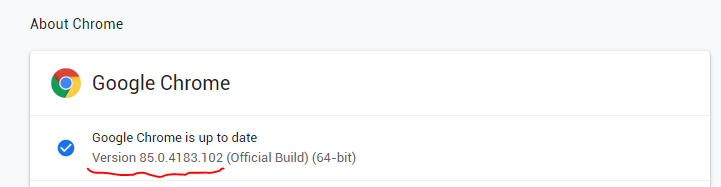
3. Download the right Chrome webdriver:  
    a) Open up: https://chromedriver.chromium.org/downloads  
    b) Download the version that matches your Chrome version (from step 2c).  
    c) Extract the `chromedriver` file to an easy to find location
4. Update the code below to the path of the `chromedriver` file from step 3c. 


In [6]:
CHROME = r"C:\chromedriver.exe" # <-- change this
os.environ ["webdriver.chrome.driver" ] = CHROME

### Test to make sure it works:  

After running the code below you should see a Chrome window open up that shows the following:  

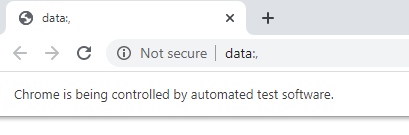

In [7]:
testDriver = webdriver.Chrome(CHROME)

In [8]:
testDriver.close() 

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: center; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Part 1: Selenium </span>
</div>  

<div style='border-style: solid; padding: 5px; border-color: darkred; border-width:5px;  text-align: center; margin-left: 100px; margin-right:100px;'>
<span style='color:black; font-size: 15px; font-weight:bold;'> Note: feel free to add as many cells as you'd like to answer these problems, you don't have to fit it all in one cell. </span>
</div>

## 1) Use `Selenium` to scrape the blog content of on the ARC platform:

The Accounting Resources Centre has a Blog section where academics can post articles related to Accounting research. 

The link is here: https://arc.eaa-online.org/blog

### 1a) Start a new chrome Driver session

### 1b) Open up the ARC Blog page using Selenium  
The URL is `https://arc.eaa-online.org/blog`

## 1c) Retrieve the following information for the first listed blog post:

1. Title  
2. Author name  
3. Link to article  
4. Number of likes  
5. Number of views  

**Hint 1:** check the documentation --> https://selenium-python.readthedocs.io/locating-elements.html  
**Hint 2:** check this link: [`get_attribute()`](https://selenium-python.readthedocs.io/api.html#selenium.webdriver.remote.webelement.WebElement.get_attribute)

### 1d) Retrieve the same information for all blog post on the page  

Store the information in a list first and then convert it to a Pandas DataFrame. 

It should look something like this:  

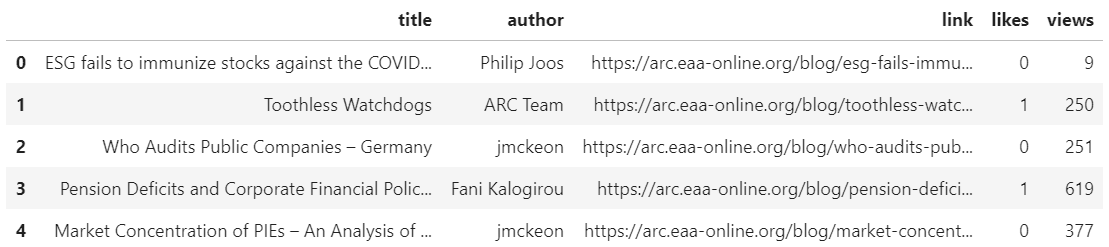

### 1e) Make Selenium click the `LOAD MORE` button  

At the bottom of the page there is a "LOAD MORE" button: 

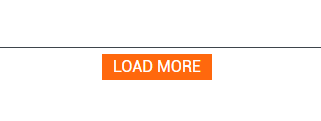

Use Selenium to click that button via your code. 

**Hint 1:** https://selenium-python.readthedocs.io/navigating.html  
**READ THIS:** If you get a `is not clickable` error you will need to scroll to the bottom so that the "LOAD MORE" button becomes visible.

### 1f) Make Selenium scroll to the "load more" button  

Sometimes elements only become active when they are visible in the browser, it is useful to be able to scroll to them so that they are in view. 

There are multiple ways to accomplish this, the easiest way is to have Selenium execute the following line of Javascript code: 

```javascript
"document.getElementsByClassName('pager-next')[0].scrollIntoView(true)"
```

**Hint:** read this page: https://pythonbasics.org/selenium-execute-javascript/

### 1g) Write a loop that will click the "load more" button until all blog posts are loaded  

If we want to get all the blog posts we will have to make sure that all blog posts are loaded on the page. 

Your task is to write a `while` loop that:

- Tries to click the "LOAD MORE" button each loop
- Waits 3 seconds in between each loop  
- Scrolls to the LOAD_MORE button each loop before trying to click it
- Stops automatically when there is no longer a LOAD MORE button to click

### 1h) Run you code from 1d again to create a DataFrame that contains all the blog posts
--> You should have 160+ observations

### 1i) Make Selenium open the homepage.  

You don't have to make it click "HOME", you can just make it open the following URL: `https://arc.eaa-online.org/`

### 1j) Search for the word `Python` using the search bar of the website.

Obviously make sure to automate everything using Python code, don't manually click anything.

**Hint 1:** https://selenium-python.readthedocs.io/navigating.html  

### 1k) Combine everything you've learned above to:

Create a function that:  

* Takes a search term as input  
* Executes the search using the input search term using the website search functionality (logic from 1j)  
* Returns a dataframe with the search results on the first page (you don't have to make it move to the next page!)

Tips:  

- Make sure you are always on the right page before executing the search logic  
- You can use `time.sleep(...)` statements to make sure your code is not executing too fast
    - Note --> there are more sophisticated ways to do this (https://selenium-python.readthedocs.io/waits.html)

It should look something like this:  

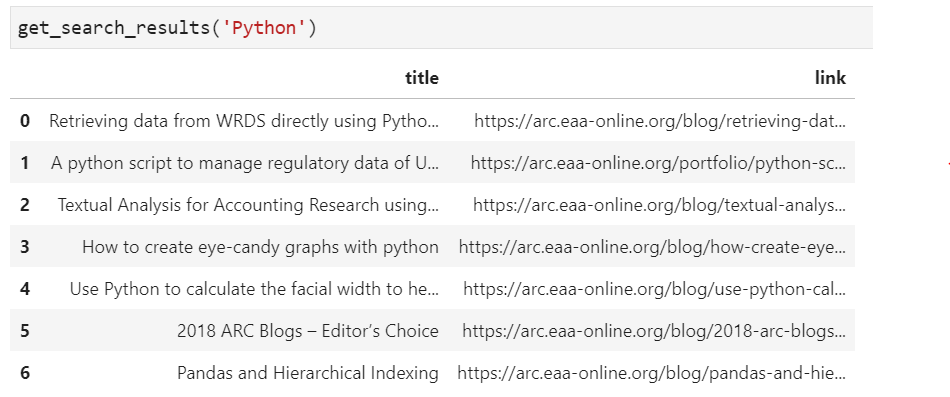

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Part 2: HTTP requests</span>
</div>

In order to complete the task below you will need to install the `Network Sniffer` Chrome extension:

https://chrome.google.com/webstore/detail/network-sniffer/coblekblkacfilmgdghecpekhadldjfj?hl=en  

You can also use the `Network` tab in Chrome Devtools.

## 2) Collect ESG data from Censible using HTTP requests sniffing

### 2a) Take a look at the following website in your (Chrome) browser:  

https://esg.censible.co/companies/Apple  

How would you go about collecting the "Corporate Values" scores? 

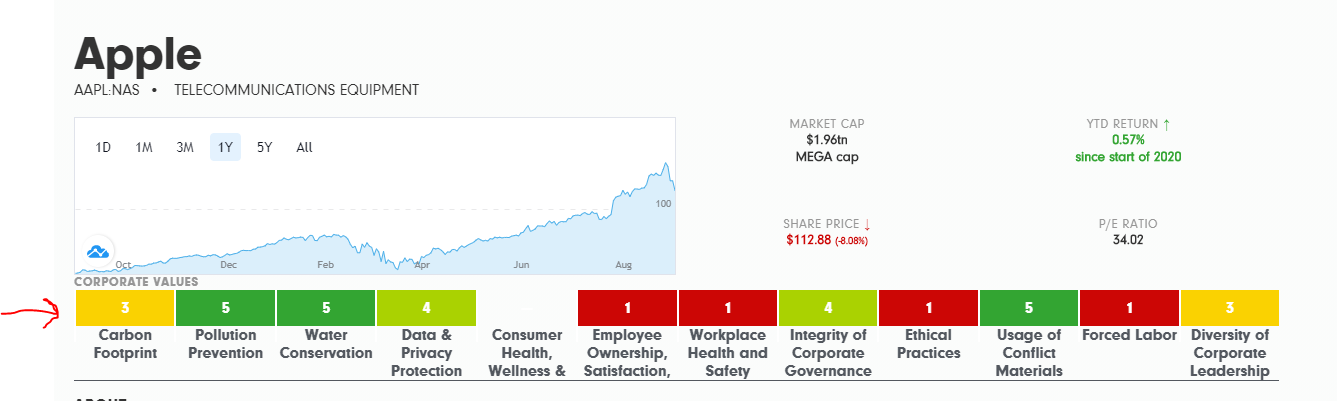

### 2b) Let's open up the `Network Sniffer` extension   

Follow these steps:

1. Make sure you have the website open in a Chrome browser + you have the `Network Sniffer` extension installed.  
2. Open up the `Network Sniffer` extension (click on the puzzle icon in the top right --> network sniffer)  
3. Refresh the page  
4. Take a look at the `Network Sniffer` extension window  

You will likely see a lot of entries, modern websites communicate a lot with external services, so this screen is likely still changing as you are looking at it. 

**Note:** the Network Sniffer will capture the traffic of all the websites that you have open, so it might be good idea to close any website that you don't need to have open (to reduce irrelevant traffic). 

### 2c) Apply a filter and look for traffic of the type `xmlhttprequest`  

**Our goal is to try and find any API endpoints that we can use to extract ESG information without having to open the website itself.**

Follow these steps:

1. Apply a filter at the top so that you only keep URLs that contain the word `censible`  
    --> This helps to filter out any traffic that is not relevant
2. Look through the remaining items that fit the following criteria:  
   - [ ] It should be of type `xmlhttprequest`  
   - [ ] It should be either a `GET` or `POST` method
   - [ ] It probably will take parameters in the URL (only for GET, not for POST)    
   - [ ] The statusCode should be 200 
3. As you find potential interesting URL endpoints you can click on them and see what they return in your browser. 

### 2d) Find the API endpoint (i.e. url) that will return the ESG ratings for a particular company code

**Hint:** filter on `censible-search` if you can't find it.  

Save the URL to a variable.

### 2e) Use `requests` to get the esg ratings for company code `000C7F-E`  

The goal is to create a dataframe that looks like this:  

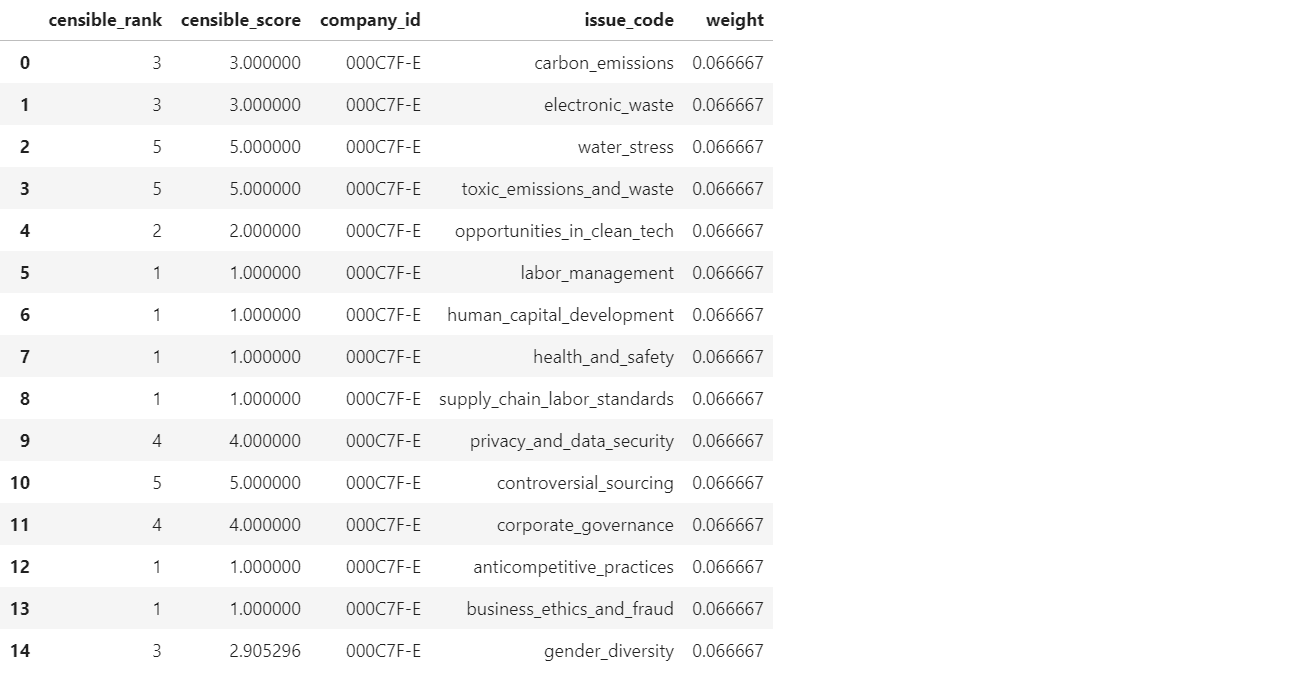

### 2f) Write down below what other pieces of information you think you can retrieve using the same technique:  

Include an example URL if you can.

- ....
- ....
- ....
- ....
- ....

- Company meta data
     https://censible-search.herokuapp.com/companies/lookup?company_id=000RCG-E
- Company summary
    https://censible-search.herokuapp.com/company/summary/000C7F-E
- Peer firms
    https://censible-search.herokuapp.com/companies/000C7F-E/peers/
- Executives
    https://censible-search.herokuapp.com/companies/000C7F-E/people/executives
- Headquarter locations
    https://censible-search.herokuapp.com/companies/000C7F-E/locations/head-quarters
- Industry / Geographical information
    https://censible-search.herokuapp.com/companies/classifications/industry-sector
- Geographic regions 
    https://censible-search.herokuapp.com/geographic-regions
- Economic classifications 
    https://censible-search.herokuapp.com/economic-classifications

### 2g) Figure out how to get the company code of a company ticker

The API endpoints we've used and identified before are only useful once we know the company code that Censible uses. 

For example, what if we want the data for Tesla, how do we get the company code?   

Follow these steps:  

1. Clear the results in the network sniffer window by clicking "clear results" (you might have to clear your filter as well).  
2. Click on "Search" in the top left of the webpage  
3. Open up the network sniffer window next to the webpage and type "tesla" as the filter (note: the filter is case-sensitive)   
    --> The idea here is that we try to find the API endpoint that will look up the company code for "tesla", which will be passed as a parameter. 
4. In the search box start typing "Tesla" and see whether anything pops up in the network sniffer.

If all goes well you should see a GET request pop up that reveals the URL that we can use!

### 2h) Create a function that looks up the company code for a given company name or ticker  

To keep things simple you can assume that the **first** search result is the one you want.  

It should look like this:  

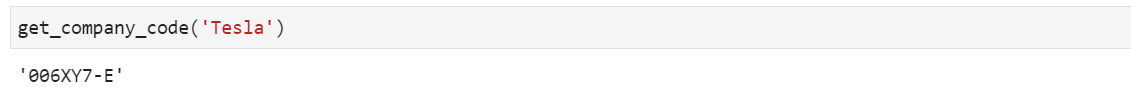

### 2i) Combine everything you learned to:  

Create a function that:  

1. Takes a company name or ticker as input  
2. Looks up the company code (using your function from 2h)
3. Retrieves the company esg ratings (using your code from 2e)   

It should look like this:  

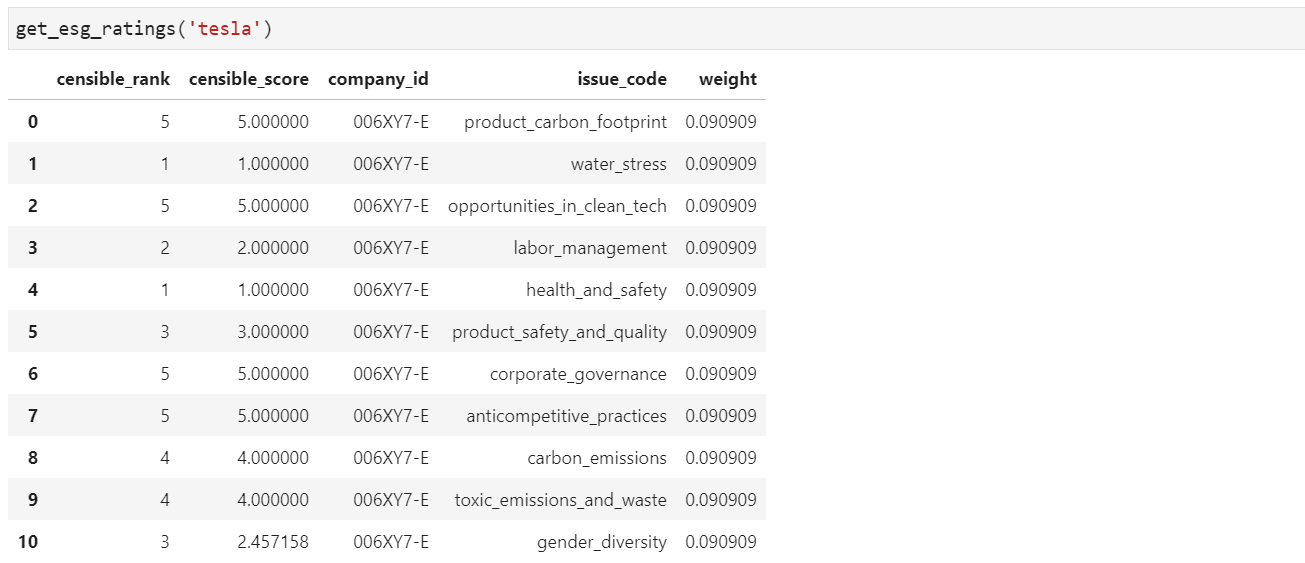